# Test vaccination component of trachoma model

We explore different vaccination scenarios to check the model brhaves rationally when vaccination is implemented

## Check vaccine parameters

We load the appropriate packages and check the vaccination parameters for the given scenario

In [16]:
from trachoma import Trachoma_Simulation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

vaccine_parameters = pd.read_csv('data/vaccination_input.csv')

vaccine_parameters

,vaccination_date,coverage,prob_block_transmission,reduce_bacterial_load,reduce_duration,waning_length
0,2015-01-01,0.8,0.8,0.5,0.5,260


Change properties of the vaccine and re-save as a new scenario

In [17]:
vaccine_parameters["coverage"] = [0.0]
vaccine_parameters["prob_block_transmission"] = [1.0]

vaccine_parameters.to_csv('data/vaccination_input_scenario_one.csv')

In [19]:



Trachoma_Simulation("data/beta_values.csv",
                    "data/mda_input_2008_2017.csv",
                    '../results/output_prev_test_vacc.csv',
                    "../infection_job.csv",
                    SaveOutput = True,
                    OutSimFilePath = "../results/out.p",
                    VaccFilePath= 'data/vaccination_input_scenario_one.csv',
                    InSimFilePath = None,
                    logger = None)

-> Timer 71ce1404-e614-433e-ab48-1429e83aa253 running 'Trachoma_Simulation', starting at 2023-02-28 04:31:18.124341
Starting 0x Trachoma runs on 16 core(s), v20210329a
Finished 0x Trachoma runs on 16 core(s), v20210329a
Writing PrevFile to path ../results/output_prev_test_vacc.csv ...
Writing InfectFile to path ../infection_job.csv ...
Dumping pickle file to ../results/out.p ...
Running time: 2 seconds.
=> Timer 71ce1404-e614-433e-ab48-1429e83aa253 finished 'Trachoma_Simulation' in 1.7709 secs


In [20]:
out1 = pd.read_csv('../results/output_prev_test_vacc.csv')

<Axes: title={'center': 'Scenario 1'}>

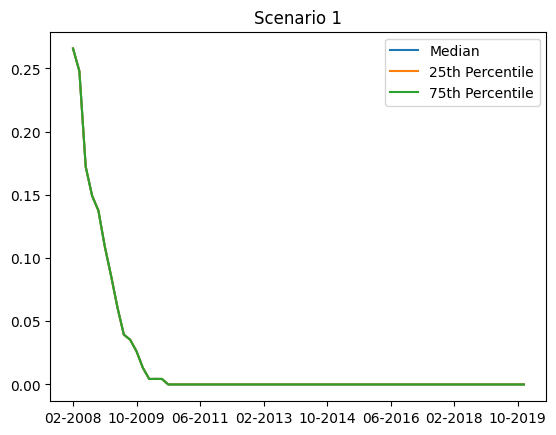

In [21]:
summary1 = pd.DataFrame({'Median': out1.iloc[:, 2:].median(),
                         '25th Percentile': out1.iloc[:, 2:].quantile(0.25),
                         '75th Percentile': out1.iloc[:, 2:].quantile(0.75)})
summary1.plot(title='Scenario 1')